# Análise de consumo de combustível

Aula: https://www.youtube.com/watch?v=PPaLUYeRlJc&t=632s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Pré - análise dos dados

In [ ]:
df = pd.read_csv('mpg.csv')

Informações sobre o conjunto de dados:

* manufacturer: nome do fabricante

* model: modelo do carro

* displ: capacidade/cilindrada do motor em litros

* year: ano de fabricação

* cyl: número de cilindros do motor

* trans: tipo de transmissão

* drv: tipo de tração. f = tração dianteira, r = tração traseira, 4 = 4x4

* cty: milhas por galão na cidade

* hwy: milhas por galão na estrada

* fl: tipo de combustível

* class: categoria de carro

In [ ]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.shape

(234, 11)

In [ ]:
df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


# Análise do consumo dos carros

In [ ]:
#amplitude do consumo (milhas por galão)  = maior - menor valor
#amplitude do consumo na estrada
amplitude = df['hwy'].max() - df['hwy'].min()
amplitude

32

In [ ]:
#consumo médio por marca
media_c = df['hwy'].groupby(by=df.manufacturer).mean()
media_c

manufacturer
audi          26.444444
chevrolet     21.894737
dodge         17.945946
ford          19.360000
honda         32.555556
hyundai       26.857143
jeep          17.625000
land rover    16.500000
lincoln       17.000000
mercury       18.000000
nissan        24.615385
pontiac       26.400000
subaru        25.571429
toyota        24.911765
volkswagen    29.222222
Name: hwy, dtype: float64

In [ ]:
#ordenação das medias
media_c.sort_values(ascending=False, inplace=True)
media_c

manufacturer
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
audi          26.444444
pontiac       26.400000
subaru        25.571429
toyota        24.911765
nissan        24.615385
chevrolet     21.894737
ford          19.360000
mercury       18.000000
dodge         17.945946
jeep          17.625000
lincoln       17.000000
land rover    16.500000
Name: hwy, dtype: float64

In [ ]:
import seaborn as sns

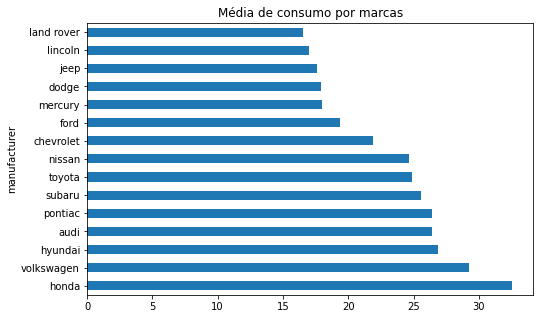

In [ ]:
#visualização do consumo médio 
plt.figure(figsize=(8, 5))
media_c.plot(kind='barh', title='Média de consumo por marcas')

In [ ]:
#mediana do consumo por marca
mediana_c = df['hwy'].groupby(by=df.manufacturer).median()
mediana_c.sort_values(ascending=False, inplace=True)
mediana_c

manufacturer
honda         32.0
volkswagen    29.0
hyundai       26.5
toyota        26.0
subaru        26.0
pontiac       26.0
nissan        26.0
audi          26.0
chevrolet     23.0
jeep          18.5
mercury       18.0
ford          18.0
lincoln       17.0
dodge         17.0
land rover    16.5
Name: hwy, dtype: float64

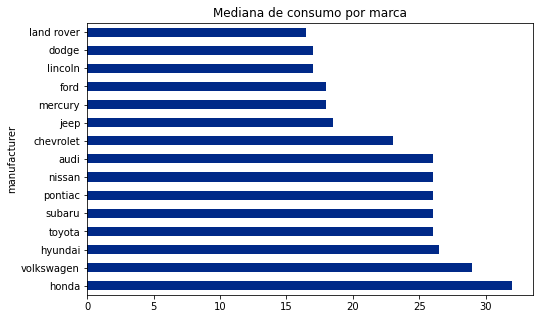

In [ ]:
plt.figure(figsize=(8, 5))
mediana_c.plot(kind='barh', title='Mediana de consumo por marca', color='#002988')

Text(0.5, 1.0, 'Consumo de combustível')

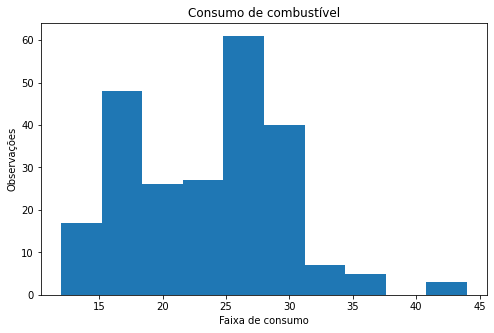

In [ ]:
#consumo de combustível de todas as marcas 
#histograma mostrará a dispersão pelas faixas de consumo 
plt.figure(figsize=(8, 5))
plt.hist(df['hwy'])
plt.xlabel('Faixa de consumo')
plt.ylabel('Observações')
plt.title('Consumo de combustível')

([], <a list of 0 Text major ticklabel objects>)

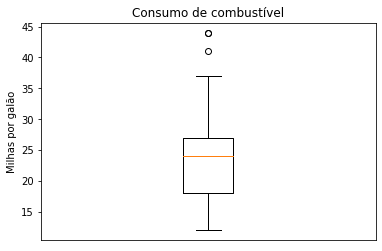

In [ ]:
#outliers 
plt.boxplot(df['hwy'])
plt.title('Consumo de combustível')
plt.ylabel('Milhas por galão')
plt.xticks([])

# Detalhamento de uma única marca

In [ ]:
audi = df.loc[df['manufacturer'] == 'audi']

In [ ]:
audi

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [ ]:
audi.shape

(18, 11)

In [ ]:
audi.describe()

,displ,year,cyl,cty,hwy
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.544444,2003.500000,5.222222,17.611111,26.444444
std,0.673203,4.630462,1.215370,1.974511,2.175322
min,1.800000,1999.000000,4.000000,15.000000,23.000000
25%,2.000000,1999.000000,4.000000,16.000000,25.000000
50%,2.800000,2003.500000,6.000000,17.500000,26.000000
75%,3.025000,2008.000000,6.000000,18.750000,27.750000
max,4.200000,2008.000000,8.000000,21.000000,31.000000


In [ ]:
audi['hwy'].mean()

26.444444444444443

In [ ]:
audi['hwy'].median()

26.0

In [ ]:
#desvio padrão do consumo
audi['hwy'].std()

2.175322078173908

([], <a list of 0 Text major ticklabel objects>)

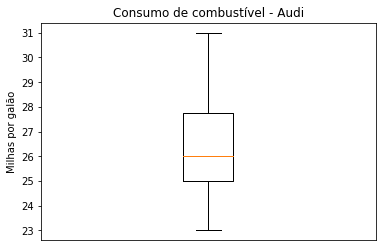

In [ ]:
#outliers 
plt.boxplot(audi['hwy'])
plt.title("Consumo de combustível - Audi")
plt.ylabel('Milhas por galão')
plt.xticks([])

In [ ]:
jeep = df.loc[df['manufacturer'] == 'jeep']

In [ ]:
jeep.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
122,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [ ]:
jeep.describe()

,displ,year,cyl,cty,hwy
count,8.000000,8.00000,8.000000,8.000000,8.000000
mean,4.575000,2005.75000,7.250000,13.500000,17.625000
std,1.015241,4.16619,1.035098,2.507133,3.248626
min,3.000000,1999.00000,6.000000,9.000000,12.000000
25%,3.925000,2005.75000,6.000000,12.500000,16.250000
50%,4.700000,2008.00000,8.000000,14.000000,18.500000
75%,4.950000,2008.00000,8.000000,15.000000,19.250000
max,6.100000,2008.00000,8.000000,17.000000,22.000000


In [ ]:
#consumo médio, amplitude e o desvio padrão deste consumo
media_jeep = jeep['hwy'].mean()
media_jeep

17.625

In [ ]:
amplitude_jeep = jeep['hwy'].max() - jeep['hwy'].min()
amplitude_jeep

10

In [ ]:
desvio_jeep = jeep['hwy'].std()
desvio_jeep

3.2486260832190936

([], <a list of 0 Text major ticklabel objects>)

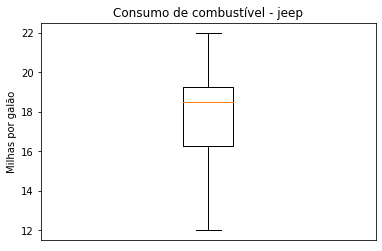

In [ ]:
plt.boxplot(jeep['hwy'])
plt.title('Consumo de combustível - jeep')
plt.ylabel('Milhas por galão')
plt.xticks([])

# Correlação entre variáveis

Relação existente entre as variáveis

In [ ]:
df.corr().style.background_gradient('Purples')
# a medida que o valor de uma variável cresce, o outro valor cresce = correlação positiva 
# a medida que o valor de uma variável cresce, o outro valor diminui = correlação negativa

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


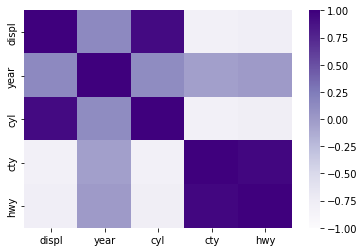

In [ ]:
sns.heatmap(df.corr(), cmap='Purples', vmin=-1, vmax=1)

In [ ]:
#Correlação entre consumo e tamanho do motor
cor = np.corrcoef(df['hwy'], df['displ'])
cor

array([[ 1.        , -0.76602002],
       [-0.76602002,  1.        ]])

In [ ]:
df['hwy'].corr(df['displ'])

-0.7660200208864681

Text(0.5, 0, 'Capacidade do motor')

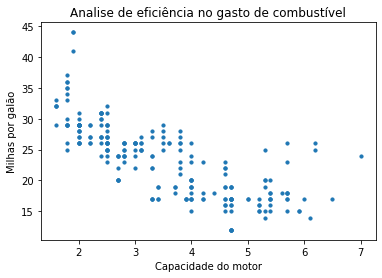

In [ ]:
plt.scatter(df['displ'], df['hwy'], s=10)
plt.title('Analise de eficiência no gasto de combustível')
plt.ylabel('Milhas por galão')
plt.xlabel('Capacidade do motor')
#correlação negativa

# Modelo de regressão linear

In [ ]:
#dados = dados analisados na correlação 
X = np.array(df['displ']).reshape(-1, 1)
y = np.array(df['hwy']).reshape(-1, 1) #quero prever meu consumo


NameError: ignored

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=31)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
#visualização da regressão linear = interseção e inclinação da reta
inclinacao = model.coef_
intersecao = model.intercept_

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_valid, y_valid, s=10) #dispersão
plt.plot(X_valid, (X_valid * inclinacao + intersecao), color='g') #reta (X + coordenadas lidas para criar a reta)
#reta de ajustamento = inclinação da reta e em que ponto ela faz a interseção com o eixo
plt.legend(['Reta de ajustamento', 'Dispersão dos dados'])
plt.ylabel('Milhas por galão')
plt.xlabel('Capacidade do motor')


In [ ]:
predicts = model.predict(X_valid)

In [ ]:
#Carro com motor 3.0
teste = np.array([3.0]).reshape(-1,1)
model.predict(teste)

In [ ]:
r2 = model.score(X_valid, y_valid)
print(f'R²:  {r2:.3f}')

In [ ]:
 #modelo de regressão linear usando a quantidade de cilindros e o consumo de combustível na cidade.
 #cyl + hwy

In [ ]:
X = np.array(df['cyl']).reshape(-1, 1)
y = np.array(df['hwy']).reshape(-1, 1)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=31)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predicts = model.predict(X_valid)

In [ ]:
intersecao = model.intercept_
inclinacao = model.coef_

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_valid, y_valid, s=10) 
plt.plot(X_valid, (X_valid * inclinacao + intersecao), color='g')
plt.legend(['Reta de ajustamento', 'Dispersão dos dados'])
plt.ylabel('Milhas por galão')
plt.xlabel('Quantidade de cilindros')

In [ ]:
#Carro com motor 6 cilindros
teste = np.array([6]).reshape(-1,1)
model.predict(teste)

In [ ]:
r2 = model.score(X_valid, y_valid)
print(f'R²:  {r2:.3f}')